<a href="https://colab.research.google.com/github/Feru34/Deep_Learning/blob/main/Talleres/Taller%201/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Integrante 1:** Felipe Rueda Rivera
- **Integrante 2:** Alfredo Mijares

### **Problemática**:
En un entorno clínico, los profesionales de la salud enfrentan el desafío de interpretar los resultados de las pruebas médicas de manera rápida y precisa para tomar decisiones informadas sobre el tratamiento y el seguimiento de los pacientes. Sin embargo, debido a la gran cantidad de datos y la complejidad de las condiciones médicas, esta tarea resulta muy tediosa.

Problema específico: Los resultados de las pruebas médicas, que se describen como "Normal," "Anormal," o "Inconcluso," deben ser interpretados con precisión para determinar la necesidad de seguimiento adicional o tratamiento especializado.
        
Los datos y el diccionario de datos lo pueden encontrar [acá](https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data).

&nbsp;

### **Actividades:**
1. Realice el debido preprocesamiento de los datos, feature engineering, EDA, Encoding Techniques, etc... Dentro de un pipeline que almacene todo el proceso.

2. Genere un modelo MLP base de predicción. Confirme si su modelo generaliza bien, o si presenta sobreajuste o subajuste. Si es alguna de las dos últimas opciones, ¿qué opciones propone para que la red MLP generalice mejor?

3. Realice una búsqueda de hiperparámetros para encontrar el mejor modelo. Documentarlo en un cuadro comparativon con el modelo base del punto anterior.

4. ¿Cómo podemos mejorar el tiempo de entrenamiento de los modelos? ¿Que es el EarlyStopping y cómo se puede automatizar utilizando callback? Está pregunta es más teórica, pero pueden incluir código si lo creen necesario.

### NOTA IMPORTANTE
- El archivo a presentar debe ser en formato .ipynb o HTML ya ejecutado. Celda que no esté ejecutada no se podrá evaluar.
- El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante respectivamente.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
!pip install keras-tuner -q
!pip install kaggle -q
!pip install scikeras -q

  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, FunctionTransformer, OneHotEncoder

import tensorflow as tf
from scikeras.wrappers import KerasClassifier

from keras.models import Sequential
from keras.layers import Dense, Input

# Entendimiento de los datos

Cada columna proporciona información específica sobre el paciente, su admisión y los servicios de salud brindados, lo que hace que este conjunto de datos sea adecuado para diversas tareas de análisis y modelado en el ámbito de la salud. Aquí tienes una breve explicación de cada columna en el conjunto de datos:

- **Name**: Esta columna representa el nombre del paciente asociado con el registro de salud.
- **Age**: La edad del paciente en el momento de la admisión, expresada en años.
- **Gender**: Indica el género del paciente, ya sea "Male" o "Female".
- **Blood Type**: El tipo de sangre del paciente, que puede ser uno de los tipos comunes de sangre (por ejemplo, "A+", "O-", etc.).
- **Medical Condition**: Esta columna especifica la condición médica principal o diagnóstico asociado con el paciente, como "Diabetes", "Hypertension", "Asthma", entre otros.
- **Date of Admission**: La fecha en la que el paciente fue admitido en el centro de salud.
- **Doctor**: El nombre del doctor responsable del cuidado del paciente durante su admisión.
- **Hospital**: Identifica el centro de salud o el hospital donde fue admitido el paciente.
- **Insurance Provider**: Esta columna indica el proveedor de seguro del paciente, que puede ser una de varias opciones, incluyendo "Aetna", "Blue Cross", "Cigna", "UnitedHealthcare", y "Medicare".
- **Billing Amount**: El monto de dinero facturado por los servicios de salud del paciente durante su admisión. Esto se expresa como un número de punto flotante.
- **Room Number**: El número de la habitación donde el paciente fue alojado durante su admisión.
- **Admission Type**: Especifica el tipo de admisión, que puede ser "Emergency", "Elective", o "Urgent", reflejando las circunstancias de la admisión.
- **Discharge Date**: La fecha en la que el paciente fue dado de alta del centro de salud, basada en la fecha de admisión y un número aleatorio de días dentro de un rango realista.
- **Medication**: Identifica un medicamento recetado o administrado al paciente durante su admisión. Ejemplos incluyen "Aspirin", "Ibuprofen", "Penicillin", "Paracetamol", y "Lipitor".
- **Test Results**: Describe los resultados de una prueba médica realizada durante la admisión del paciente. Los valores posibles incluyen "Normal", "Abnormal", o "Inconclusive", indicando el resultado de la prueba.

### *Criterio Realiza el análisis exploratorio de la información:*
simplemente verificar los diferentes parámetros de la columna donde se proporciona información sobre el paciente, su admisión y
los servicios de salud brindados, lo que hace que este conjunto de datos sea
adecuado para diversas tareas de análisis y hacer un modelamiento más optimo en
el ámbito de la salud. Estas variables independientes pueden afectar el
resultado de test en cuestión. Los resultados de este test es una prueba médica
realizada durante el ingreso del paciente. Donde los valores posibles incluyen
"Normal", "Anormal" o "No concluyente", que indican el resultado de la prueba. Como comentario final mencionamos, para que no allá tanto sesgo al dividir los train y test se categorizo el Test Result con un muestreo estratificado.

In [ ]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Pandas profiling Report
Utlizamos Pandas profiling Report para tener un mejor entendimiento de cada columna, dentro de este analisis podemos concluir lo siguiente:
- No todas las columnas son de utilidad para la solución del problema, por lo que hay que eliminar las siguientes columnas en la preparación de los datos: 'Name', 'Doctor', 'Hospital', 'Room Number','Discharge Date'y 'Date of Admission'
- Algunas columnas tienen variables categoricas por lo que en la preparación de los datos hay que transformarlas y no eliminarlas pues son importantes para la resolución del problema.  

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preparación de los datos:

En machine learning, la **partición de los datos en conjuntos de entrenamiento (Train) y prueba (Test)** es un paso crucial para evaluar el rendimiento de un modelo. Consiste en lo siguiente:

1. **División de los datos**: Se separa el conjunto de datos original en dos subconjuntos: uno para entrenar el modelo (Train) y otro para probarlo (Test). Generalmente, se utiliza una proporción de 80-20 o 70-30, donde el mayor porcentaje se destina al entrenamiento⁴.

2. **Entrenamiento del modelo**: El conjunto de entrenamiento se utiliza para ajustar el modelo. Durante este proceso, el modelo aprende las relaciones y patrones presentes en los datos.

3. **Evaluación del modelo**: Una vez entrenado, el modelo se evalúa utilizando el conjunto de prueba. Este conjunto contiene datos que el modelo no ha visto antes, lo que permite medir su capacidad de generalización y su rendimiento en datos nuevos⁴.

4. **Evitar el sobreajuste**: La partición ayuda a evitar el sobreajuste (overfitting), que ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos⁴.

5. **Función `train_test_split`**: En Python, la biblioteca scikit-learn ofrece la función `train_test_split` para realizar esta división de manera sencilla y eficiente⁷.


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2 , random_state=33)

In [ ]:
df_train

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
21883,jOSeph dORsEY,71,Female,A+,Diabetes,2021-09-26,Angela Wright,Meyers-Phillips,Cigna,40284.030173,283,Urgent,2021-10-02,Aspirin,Inconclusive
29945,MONicA KiNg,44,Male,A+,Arthritis,2019-07-26,Ann Trujillo,Inc Rodriguez,Blue Cross,7593.331495,264,Elective,2019-08-13,Paracetamol,Abnormal
43270,JEnNiFeR pIErce,76,Female,A+,Asthma,2021-01-05,Matthew Smith,Jones Inc,UnitedHealthcare,44626.804004,495,Urgent,2021-01-13,Paracetamol,Normal
11231,jEnnifer rICH,60,Female,A+,Hypertension,2023-06-13,Shannon Estes,"Hendricks, Scott Harrington and",UnitedHealthcare,19681.002990,290,Emergency,2023-07-13,Paracetamol,Abnormal
9723,eliJaH coMbS,74,Female,A+,Asthma,2023-02-25,Chad Brown,Thomas Inc,Cigna,32925.968925,225,Elective,2023-03-27,Lipitor,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,beTh kEllY,70,Male,A-,Hypertension,2020-01-25,Crystal Barber,Burnett-Wilcox,Aetna,17589.653577,367,Urgent,2020-02-10,Ibuprofen,Inconclusive
578,tREVor WRiGHt,39,Female,O+,Cancer,2020-12-22,Matthew Nelson,"Marshall, and Koch Harper",Blue Cross,13643.730852,380,Elective,2020-12-27,Lipitor,Normal
38616,david hoWaRD,78,Female,AB-,Cancer,2022-06-11,Elizabeth Schroeder,Gutierrez-Rasmussen,UnitedHealthcare,16895.699016,496,Emergency,2022-06-15,Aspirin,Abnormal
2439,wILLIAm sIlVA,36,Female,AB+,Asthma,2023-11-27,Margaret Boone,Mitchell and Sons,Medicare,5854.756737,500,Elective,2023-12-10,Paracetamol,Abnormal


In [ ]:
df_test

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
8814,AlICE jOhnsOn,58,Female,A-,Arthritis,2020-08-09,Christine Harper,"Davenport, Baker Robinson and",Aetna,9847.650755,391,Emergency,2020-09-07,Paracetamol,Normal
37214,SUSAN mIChAEl,74,Female,AB+,Arthritis,2019-10-08,Scott Peterson,Inc Lester,Blue Cross,29035.561479,362,Emergency,2019-10-16,Penicillin,Normal
22750,glOria RuIZ,21,Male,O-,Cancer,2021-03-01,James May,Sons Williams and,Cigna,29574.629891,449,Urgent,2021-03-18,Lipitor,Inconclusive
30726,BRADLEY rODRigUEz,66,Male,AB-,Diabetes,2022-04-09,Diana Marshall,"Lewis and Carlson Johnson,",Medicare,39143.254493,428,Urgent,2022-04-18,Aspirin,Abnormal
15855,kiMBERly sTaNton,45,Female,B+,Arthritis,2020-03-24,John Farmer,"and Davis, Duran Thompson",UnitedHealthcare,47637.234632,449,Elective,2020-04-11,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,JUstin pEARsOn,57,Female,AB-,Hypertension,2021-06-02,Jeffrey Jacobs,"Myers and Brooks, Flores",Cigna,3553.740885,238,Elective,2021-06-14,Aspirin,Inconclusive
44836,cYNtHiA brADlEy,57,Male,O-,Arthritis,2022-11-25,Molly Dillon,Vang-Carroll,Blue Cross,38503.842844,139,Elective,2022-12-05,Ibuprofen,Abnormal
42791,gARY WHiTe,37,Male,O-,Obesity,2020-04-09,Teresa Chambers,Jones-Anderson,UnitedHealthcare,33835.470495,476,Urgent,2020-05-09,Aspirin,Normal
9882,KeitH mOrAlES,66,Male,A-,Hypertension,2019-05-17,James Cantrell MD,Taylor-Williams,Blue Cross,45402.786544,497,Elective,2019-05-21,Penicillin,Abnormal


## Información general del dataframe

Veremos el total de registros, saber si existen columna con datos nulos así como los tipos de datos

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44400 entries, 21883 to 23572
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                44400 non-null  object 
 1   Age                 44400 non-null  int64  
 2   Gender              44400 non-null  object 
 3   Blood Type          44400 non-null  object 
 4   Medical Condition   44400 non-null  object 
 5   Date of Admission   44400 non-null  object 
 6   Doctor              44400 non-null  object 
 7   Hospital            44400 non-null  object 
 8   Insurance Provider  44400 non-null  object 
 9   Billing Amount      44400 non-null  float64
 10  Room Number         44400 non-null  int64  
 11  Admission Type      44400 non-null  object 
 12  Discharge Date      44400 non-null  object 
 13  Medication          44400 non-null  object 
 14  Test Results        44400 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4+

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

onehot_data = ohe.fit_transform(df_train[['Test Results']])
encoded_df = pd.DataFrame(onehot_data, columns=ohe.get_feature_names_out(['Test Results']), index=df_train.index)
train_data = pd.concat([df_train, encoded_df], axis=1)

train_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
21883,jOSeph dORsEY,71,Female,A+,Diabetes,2021-09-26,Angela Wright,Meyers-Phillips,Cigna,40284.030173,283,Urgent,2021-10-02,Aspirin,Inconclusive,0.0,1.0,0.0
29945,MONicA KiNg,44,Male,A+,Arthritis,2019-07-26,Ann Trujillo,Inc Rodriguez,Blue Cross,7593.331495,264,Elective,2019-08-13,Paracetamol,Abnormal,1.0,0.0,0.0
43270,JEnNiFeR pIErce,76,Female,A+,Asthma,2021-01-05,Matthew Smith,Jones Inc,UnitedHealthcare,44626.804004,495,Urgent,2021-01-13,Paracetamol,Normal,0.0,0.0,1.0
11231,jEnnifer rICH,60,Female,A+,Hypertension,2023-06-13,Shannon Estes,"Hendricks, Scott Harrington and",UnitedHealthcare,19681.002990,290,Emergency,2023-07-13,Paracetamol,Abnormal,1.0,0.0,0.0
9723,eliJaH coMbS,74,Female,A+,Asthma,2023-02-25,Chad Brown,Thomas Inc,Cigna,32925.968925,225,Elective,2023-03-27,Lipitor,Normal,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,beTh kEllY,70,Male,A-,Hypertension,2020-01-25,Crystal Barber,Burnett-Wilcox,Aetna,17589.653577,367,Urgent,2020-02-10,Ibuprofen,Inconclusive,0.0,1.0,0.0
578,tREVor WRiGHt,39,Female,O+,Cancer,2020-12-22,Matthew Nelson,"Marshall, and Koch Harper",Blue Cross,13643.730852,380,Elective,2020-12-27,Lipitor,Normal,0.0,0.0,1.0
38616,david hoWaRD,78,Female,AB-,Cancer,2022-06-11,Elizabeth Schroeder,Gutierrez-Rasmussen,UnitedHealthcare,16895.699016,496,Emergency,2022-06-15,Aspirin,Abnormal,1.0,0.0,0.0
2439,wILLIAm sIlVA,36,Female,AB+,Asthma,2023-11-27,Margaret Boone,Mitchell and Sons,Medicare,5854.756737,500,Elective,2023-12-10,Paracetamol,Abnormal,1.0,0.0,0.0


In [ ]:
X_train = train_data.drop(columns=['Test Results_Abnormal', 'Test Results_Inconclusive', 'Test Results_Normal', 'Test Results'])
y_train = train_data[['Test Results_Abnormal', 'Test Results_Inconclusive', 'Test Results_Normal']]


display(X_train)
display(y_train)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication
21883,jOSeph dORsEY,71,Female,A+,Diabetes,2021-09-26,Angela Wright,Meyers-Phillips,Cigna,40284.030173,283,Urgent,2021-10-02,Aspirin
29945,MONicA KiNg,44,Male,A+,Arthritis,2019-07-26,Ann Trujillo,Inc Rodriguez,Blue Cross,7593.331495,264,Elective,2019-08-13,Paracetamol
43270,JEnNiFeR pIErce,76,Female,A+,Asthma,2021-01-05,Matthew Smith,Jones Inc,UnitedHealthcare,44626.804004,495,Urgent,2021-01-13,Paracetamol
11231,jEnnifer rICH,60,Female,A+,Hypertension,2023-06-13,Shannon Estes,"Hendricks, Scott Harrington and",UnitedHealthcare,19681.002990,290,Emergency,2023-07-13,Paracetamol
9723,eliJaH coMbS,74,Female,A+,Asthma,2023-02-25,Chad Brown,Thomas Inc,Cigna,32925.968925,225,Elective,2023-03-27,Lipitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,beTh kEllY,70,Male,A-,Hypertension,2020-01-25,Crystal Barber,Burnett-Wilcox,Aetna,17589.653577,367,Urgent,2020-02-10,Ibuprofen
578,tREVor WRiGHt,39,Female,O+,Cancer,2020-12-22,Matthew Nelson,"Marshall, and Koch Harper",Blue Cross,13643.730852,380,Elective,2020-12-27,Lipitor
38616,david hoWaRD,78,Female,AB-,Cancer,2022-06-11,Elizabeth Schroeder,Gutierrez-Rasmussen,UnitedHealthcare,16895.699016,496,Emergency,2022-06-15,Aspirin
2439,wILLIAm sIlVA,36,Female,AB+,Asthma,2023-11-27,Margaret Boone,Mitchell and Sons,Medicare,5854.756737,500,Elective,2023-12-10,Paracetamol


,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
21883,0.0,1.0,0.0
29945,1.0,0.0,0.0
43270,0.0,0.0,1.0
11231,1.0,0.0,0.0
9723,0.0,0.0,1.0
...,...,...,...
27282,0.0,1.0,0.0
578,0.0,0.0,1.0
38616,1.0,0.0,0.0
2439,1.0,0.0,0.0


## Eliminación de datos irelevantes
Dado que la variable objetivo es Test Results, se deben eliminar las columnas que no aportan información relevante para predecir esta variable o que son irrelevantes desde un punto de vista analítico. A continuación las variables que se decidieron eliminar:

Name: El nombre del paciente no tiene relación con los resultados de las pruebas médicas y no aporta información útil para el modelo. Es una columna identificativa pero no predictiva.

Doctor: Aunque el nombre del doctor podría tener una relación indirecta con los resultados de las pruebas, en general no es un factor predictivo directo y podría ser considerado irrelevante para este análisis.

Hospital: Similar al doctor, el hospital donde fue atendido el paciente podría no tener un impacto directo en los resultados de las pruebas. A menos que tengas una razón específica para creer que el hospital afecta los resultados, podría eliminarse.

Room Number: El número de la habitación no tiene ninguna relación con los resultados de las pruebas médicas y debería ser eliminado.

Discharge Date y Date of Admission: La fecha de alta podría no ser relevante para los resultados de la prueba. Sin embargo, si se considerara la diferencia entre la fecha de admisión y la de alta como una característica (por ejemplo, la duración de la estancia), esta columna podría ser útil, pero tal como está, podría eliminarse.

Las demás columnas podrían aportar información relevante para predecir los resultados de las pruebas médicas, por lo que deberías mantenerlas, a menos que se demuestre lo contrario en un análisis más detallado.

In [ ]:
# 1. Eliminar columnas que no se usarán
def drop_columns(X):
  X = X.drop(columns=[
  'Name',
  'Doctor',
  'Hospital',
  'Room Number',
  'Discharge Date',
  'Date of Admission'
  ])
  return X

drop_transformer = FunctionTransformer(drop_columns)

## Convertir variables categoricas a numericas

In [ ]:
# 2. Pasar variables categoricas a numéricas
def categoricasANumericas(X):
  #Generos
  X['Male'] = X['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
  #Tipo de sangre
  X['A-'] = X['Blood Type'].apply(lambda x: 1 if x == 'A-' else 0)
  X['O+'] = X['Blood Type'].apply(lambda x: 1 if x == 'O+' else 0)
  X['AB-'] = X['Blood Type'].apply(lambda x: 1 if x == 'AB-' else 0)
  X['A+'] = X['Blood Type'].apply(lambda x: 1 if x == 'A+' else 0)
  X['AB+'] = X['Blood Type'].apply(lambda x: 1 if x == 'AB+' else 0)
  X['B+'] = X['Blood Type'].apply(lambda x: 1 if x == 'B+' else 0)
  X['O-'] = X['Blood Type'].apply(lambda x: 1 if x == 'O-' else 0)
  # Condición Medica
  X['Arthritis'] = X['Medical Condition'].apply(lambda x: 1 if x == 'Arthritis' else 0)
  X['Hypertension'] = X['Medical Condition'].apply(lambda x: 1 if x == 'Hypertension' else 0)
  X['Obesity'] = X['Medical Condition'].apply(lambda x: 1 if x == 'Obesity' else 0)
  X['Cancer'] = X['Medical Condition'].apply(lambda x: 1 if x == 'Cancer' else 0)
  X['Diabetes'] = X['Medical Condition'].apply(lambda x: 1 if x == 'Diabetes' else 0)
  # Proveedor de seguros
  X['Cigna'] = X['Insurance Provider'].apply(lambda x: 1 if x == 'Cigna' else 0)
  X['Medicare'] = X['Insurance Provider'].apply(lambda x: 1 if x == 'Medicare' else 0)
  X['UnitedHealthcare'] = X['Insurance Provider'].apply(lambda x: 1 if x == 'UnitedHealthcare' else 0)
  X['Blue Cross'] = X['Insurance Provider'].apply(lambda x: 1 if x == 'Blue Cross' else 0)
  X['Aetna'] = X['Insurance Provider'].apply(lambda x: 1 if x == 'Aetna' else 0)
  # Tipo de admisión
  X['Elective'] = X['Admission Type'].apply(lambda x: 1 if x == 'Elective' else 0)
  X['Urgent'] = X['Admission Type'].apply(lambda x: 1 if x == 'Urgent' else 0)
  X['Emergency'] = X['Admission Type'].apply(lambda x: 1 if x == 'Emergency' else 0)
  # Medicación
  X['Lipitor'] = X['Medication'].apply(lambda x: 1 if x == 'Lipitor' else 0)
  X['Ibuprofen'] = X['Medication'].apply(lambda x: 1 if x == 'Ibuprofen' else 0)
  X['Aspirin'] = X['Medication'].apply(lambda x: 1 if x == 'Aspirin' else 0)
  X['Paracetamol'] = X['Medication'].apply(lambda x: 1 if x == 'Paracetamol' else 0)
  X['Penicillin'] = X['Medication'].apply(lambda x: 1 if x == 'Penicillin' else 0)

  X = X.drop(columns=['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication'])
  return X

numericas_transformer = FunctionTransformer(categoricasANumericas)

# 3. Escalar datos con StandardScaler
ct = ColumnTransformer(
    transformers=[
       ('scaler', StandardScaler(), slice(0, -1))
    ]
)


In [ ]:
#Declaramos los pasos y creamos el pipeline
estimators = [
              ('drop_columns', drop_transformer),
              ('categoricasANumericas', numericas_transformer),
              ('preprocessor', ct)
              ]

# Crear el pipeline
pipe = Pipeline(estimators)

In [ ]:
pipe.fit(X_train)

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7c3da6da7d90>)),
                ('categoricasANumericas',
                 FunctionTransformer(func=<function categoricasANumericas at 0x7c3da6579510>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, -1, None))]))])

In [ ]:
pd.DataFrame(pipe.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.994713,1.038256,-1.001578,-0.379675,-0.379325,-0.379131,2.640317,-0.377809,-0.375704,-0.37547,...,-0.501689,-0.499507,-0.496196,-0.711734,1.413211,-0.701989,-0.500387,-0.501970,2.006640,-0.498979
1,-0.382103,-1.263156,0.998425,-0.379675,-0.379325,-0.379131,2.640317,-0.377809,-0.375704,-0.37547,...,-0.501689,2.001973,-0.496196,1.405019,-0.707609,-0.701989,-0.500387,-0.501970,-0.498345,2.004091
2,1.249679,1.343985,-1.001578,-0.379675,-0.379325,-0.379131,2.640317,-0.377809,-0.375704,-0.37547,...,1.993268,-0.499507,-0.496196,-0.711734,1.413211,-0.701989,-0.500387,-0.501970,-0.498345,2.004091
3,0.433788,-0.412189,-1.001578,-0.379675,-0.379325,-0.379131,2.640317,-0.377809,-0.375704,-0.37547,...,1.993268,-0.499507,-0.496196,-0.711734,-0.707609,1.424524,-0.500387,-0.501970,-0.498345,2.004091
4,1.147693,0.520251,-1.001578,-0.379675,-0.379325,-0.379131,2.640317,-0.377809,-0.375704,-0.37547,...,-0.501689,-0.499507,-0.496196,1.405019,-0.707609,-0.701989,1.998453,-0.501970,-0.498345,-0.498979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44395,0.943720,-0.559419,0.998425,2.633833,-0.379325,-0.379131,-0.378742,-0.377809,-0.375704,-0.37547,...,-0.501689,-0.499507,2.015331,-0.711734,1.413211,-0.701989,-0.500387,1.992151,-0.498345,-0.498979
44396,-0.637069,-0.837210,-1.001578,-0.379675,2.636260,-0.379131,-0.378742,-0.377809,-0.375704,-0.37547,...,-0.501689,2.001973,-0.496196,1.405019,-0.707609,-0.701989,1.998453,-0.501970,-0.498345,-0.498979
44397,1.351665,-0.608273,-1.001578,-0.379675,-0.379325,2.637611,-0.378742,-0.377809,-0.375704,-0.37547,...,1.993268,-0.499507,-0.496196,-0.711734,-0.707609,1.424524,-0.500387,-0.501970,2.006640,-0.498979
44398,-0.790049,-1.385551,-1.001578,-0.379675,-0.379325,-0.379131,-0.378742,2.646841,-0.375704,-0.37547,...,-0.501689,-0.499507,-0.496196,1.405019,-0.707609,-0.701989,-0.500387,-0.501970,-0.498345,2.004091


# Modelamiento
Dado que realizaremos un modelamiento junto a un Pipeline, primero tendremos que definir una función que nos ayudará a construir nuestra Red Neuronal que llamaremos get_model. Par ello utilizamos la libreria SciKeras.

In [ ]:

def get_model(meta, activation, n_layers, hidden_layer_1, hidden_layer_2 = None, hidden_layer_3 = None):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = [hidden_layer_1, hidden_layer_2, hidden_layer_3]

    model = Sequential(name="Red_MLP")
    model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))

    model.add(Dense(3, activation='softmax'))
    return model

In [ ]:
clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy",
    n_layers=2,
    hidden_layer_1=32,
    hidden_layer_2=16,
    hidden_layer_3=8,
    optimizer="sgd",
    metrics=["accuracy"],
    epochs=10,
    activation="relu"
)

clf

KerasClassifier(
	model=<function get_model at 0x7c3da6da7b50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	n_layers=2
	hidden_layer_1=32
	hidden_layer_2=16
	hidden_layer_3=8
	activation=relu
	class_weight=None
)

In [ ]:
estimators = [
              ('drop_columns', drop_transformer),
              ('categoricasANumericas', numericas_transformer),
              ('preprocessor', ct),
              ('clf', clf),
              ]

pipe = Pipeline(estimators)

In [ ]:
pipe.fit(X_train, y_train)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3323 - loss: 1.1391
Epoch 2/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3393 - loss: 1.1026
Epoch 3/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3444 - loss: 1.0994
Epoch 4/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3451 - loss: 1.0987
Epoch 5/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3495 - loss: 1.0978
Epoch 6/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3511 - loss: 1.0966
Epoch 7/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3506 - loss: 1.0967
Epoch 8/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3549 - loss: 1.0966
Epoch 9/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3617 - loss: 1.0953
Epoch 10/10
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3604 - loss: 1.0954


Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7c3da6da7d90>)),
                ('categoricasANumericas',
                 FunctionTransformer(func=<function categoricasANumericas at 0x7c3da6579510>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  slice(0, -1, None))])),
                ('clf',
                 KerasClassifier(activation='relu', epochs=10, hidden_layer_1=32, hidden_layer_2=16, hidden_layer_3=8, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7c3da6da7b50>, n_layers=2, optimizer='sgd'))])

## Evaluación.

In [ ]:
y_pred = pipe.predict(X_train)
y_pred

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.38      0.37     14932
           1       0.38      0.29      0.33     14631
           2       0.36      0.42      0.39     14837

   micro avg       0.36      0.36      0.36     44400
   macro avg       0.36      0.36      0.36     44400
weighted avg       0.36      0.36      0.36     44400
 samples avg       0.36      0.36      0.36     44400



## 4.1 Busqueda hiper parametros

In [ ]:
params = {
    "preprocessor" : [ StandardScaler()],
    "clf__hidden_layer_1": [8, 100, 10, 5],
    "clf__hidden_layer_2": [8, 100, 10, 5],
    "clf__hidden_layer_3": [8, 100, 10, 5],
    "clf__n_layers": [1,2,3],
    "clf__activation": ["relu", "linear", "sigmoid"],
    "clf__optimizer": ["adam", "sgd"],
    "clf__optimizer__learning_rate": [0.0001, 0.001, 0.1],
    "clf__epochs": [10, 30, 20],
}
grid = RandomizedSearchCV(pipe, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)

In [ ]:
grid.fit(X_train, y_train)
#45 minutos

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3295 - loss: 1.1139
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3295 - loss: 1.1001
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3380 - loss: 1.0989
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3400 - loss: 1.0990
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3400 - loss: 1.0989
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3395 - loss: 1.0987
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3399 - loss: 1.0986
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3448 - loss: 1.0983
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3428 - loss: 1.0982
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3458 - loss: 1.0983
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3333 - loss: 1.1901
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3314 - loss: 1.1191
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3347 - loss: 1.1016
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3300 - loss: 1.0991
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3342 - loss: 1.0986
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3312 - loss: 1.0989
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3412 - loss: 1.0986
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3444 - loss: 1.0984
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3444 - loss: 1.0983
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3465 - loss: 1.0981
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3339 - loss: 1.2419
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3350 - loss: 1.1251
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3341 - loss: 1.1025
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3363 - loss: 1.0991
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3417 - loss: 1.0983
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3329 - loss: 1.0984
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3387 - loss: 1.0985
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3415 - loss: 1.0981
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3456 - loss: 1.0982
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3397 - loss: 1.0983
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3283 - loss: 1.1182
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3298 - loss: 1.1143
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3253 - loss: 1.1147
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3255 - loss: 1.1118
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3313 - loss: 1.1106
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3332 - loss: 1.1094
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3296 - loss: 1.1086
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3314 - loss: 1.1071
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3338 - loss: 1.1074
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3378 - loss: 1.1056
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3293 - loss: 1.1063
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3349 - loss: 1.1259
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3312 - loss: 1.1202
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3278 - loss: 1.1154
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3302 - loss: 1.1139
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3267 - loss: 1.1136
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3312 - loss: 1.1103
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3351 - loss: 1.1093
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3261 - loss: 1.1097
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3310 - loss: 1.1092
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3296 - loss: 1.1074
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3304 - loss: 1.1066
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3287 - loss: 1.1990
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3307 - loss: 1.1751
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3321 - loss: 1.1557
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3302 - loss: 1.1445
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3281 - loss: 1.1374
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3347 - loss: 1.1272
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3352 - loss: 1.1227
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3317 - loss: 1.1187
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3311 - loss: 1.1159
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3263 - loss: 1.1172
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3297 - loss: 1.1133
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3361 - loss: 1.1471
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3345 - loss: 1.1036
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3342 - loss: 1.1004
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3372 - loss: 1.0991
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3351 - loss: 1.0991
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3337 - loss: 1.0989
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3370 - loss: 1.0986
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3399 - loss: 1.0986
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3378 - loss: 1.0987
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3358 - loss: 1.0988
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3361 - loss: 1.0985
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3317 - loss: 1.1265
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3360 - loss: 1.1009
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3341 - loss: 1.0993
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3290 - loss: 1.0993
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3395 - loss: 1.0985
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3313 - loss: 1.0989
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3359 - loss: 1.0988
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3340 - loss: 1.0988
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3369 - loss: 1.0987
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3402 - loss: 1.0987
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3353 - loss: 1.0988
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3368 - loss: 1.1801
Epoch 2/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3358 - loss: 1.1017
Epoch 3/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3411 - loss: 1.0989
Epoch 4/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3348 - loss: 1.0991
Epoch 5/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3373 - loss: 1.0989
Epoch 6/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3347 - loss: 1.0990
Epoch 7/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3354 - loss: 1.0988
Epoch 8/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3401 - loss: 1.0990
Epoch 9/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3320 - loss: 1.0991
Epoch 10/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3437 - loss: 1.0990
Epoch 11/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3391 - loss: 1.0987
Epoch 12/20
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3408 - loss: 1.1860
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3347 - loss: 1.1090
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3329 - loss: 1.1063
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3298 - loss: 1.1056
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3318 - loss: 1.1036
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3297 - loss: 1.1034
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3316 - loss: 1.1048
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3343 - loss: 1.1042
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3286 - loss: 1.1040
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3337 - loss: 1.1059
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3273 - loss: 1.1432
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3275 - loss: 1.1039
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3314 - loss: 1.1044
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3315 - loss: 1.1041
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3364 - loss: 1.1049
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3353 - loss: 1.1028
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3295 - loss: 1.1036
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3269 - loss: 1.1035
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3282 - loss: 1.1043
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3335 - loss: 1.1043
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3303 - loss: 1.1717
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3319 - loss: 1.1042
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3261 - loss: 1.1050
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3344 - loss: 1.1027
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3335 - loss: 1.1061
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3301 - loss: 1.1043
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3288 - loss: 1.1055
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3274 - loss: 1.1052
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3328 - loss: 1.1045
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3339 - loss: 1.1055
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3288 - loss: 1.4256
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3253 - loss: 1.3755
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3244 - loss: 1.3244
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3254 - loss: 1.2830
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3264 - loss: 1.2548
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3281 - loss: 1.2325
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3337 - loss: 1.2116
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3275 - loss: 1.1947
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3244 - loss: 1.1866
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3327 - loss: 1.1764
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3332 - loss: 1.2830
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3361 - loss: 1.2636
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3347 - loss: 1.2493
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3353 - loss: 1.2331
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3361 - loss: 1.2203
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3320 - loss: 1.2165
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3323 - loss: 1.2056
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3338 - loss: 1.1984
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3340 - loss: 1.1896
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3316 - loss: 1.1866
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3379 - loss: 1.4268
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3360 - loss: 1.3782
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3366 - loss: 1.3316
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3338 - loss: 1.3033
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3367 - loss: 1.2781
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3346 - loss: 1.2532
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3281 - loss: 1.2447
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3354 - loss: 1.2240
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3292 - loss: 1.2134
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3352 - loss: 1.1982
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3320 - loss: 1.1039
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3348 - loss: 1.0995
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3491 - loss: 1.0978
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3496 - loss: 1.0969
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3498 - loss: 1.0967
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3555 - loss: 1.0961
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3603 - loss: 1.0961
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3575 - loss: 1.0957
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3636 - loss: 1.0954
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3649 - loss: 1.0947
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3332 - loss: 1.1056
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3401 - loss: 1.0983
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3450 - loss: 1.0981
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3473 - loss: 1.0976
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3522 - loss: 1.0968
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3560 - loss: 1.0966
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3568 - loss: 1.0961
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3651 - loss: 1.0955
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3601 - loss: 1.0953
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3629 - loss: 1.0948
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3324 - loss: 1.1052
Epoch 2/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3364 - loss: 1.0992
Epoch 3/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3487 - loss: 1.0977
Epoch 4/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3559 - loss: 1.0971
Epoch 5/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3599 - loss: 1.0958
Epoch 6/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3564 - loss: 1.0963
Epoch 7/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3573 - loss: 1.0957
Epoch 8/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3619 - loss: 1.0952
Epoch 9/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3641 - loss: 1.0947
Epoch 10/10
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3638 - loss: 1.0949
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3325 - loss: 1.3130
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3297 - loss: 1.2800
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3335 - loss: 1.2482
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3334 - loss: 1.2264
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3301 - loss: 1.2190
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3313 - loss: 1.2047
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3340 - loss: 1.1933
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3304 - loss: 1.1819
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3347 - loss: 1.1718
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3348 - loss: 1.1675
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3317 - loss: 1.1572
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3358 - loss: 1.7056
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3348 - loss: 1.5968
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3300 - loss: 1.5244
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3349 - loss: 1.4467
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3382 - loss: 1.3876
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3304 - loss: 1.3620
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3376 - loss: 1.3218
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3336 - loss: 1.2929
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3384 - loss: 1.2697
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3404 - loss: 1.2455
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3354 - loss: 1.2354
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3300 - loss: 1.4440
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3356 - loss: 1.3953
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3313 - loss: 1.3610
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3379 - loss: 1.3168
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3301 - loss: 1.3073
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3328 - loss: 1.2760
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3350 - loss: 1.2607
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3405 - loss: 1.2414
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3321 - loss: 1.2348
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3350 - loss: 1.2184
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3357 - loss: 1.2078
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3372 - loss: 1.1290
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3471 - loss: 1.0990
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3560 - loss: 1.0973
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3579 - loss: 1.0965
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3545 - loss: 1.0971
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3533 - loss: 1.0966
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3584 - loss: 1.0959
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3579 - loss: 1.0961
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3543 - loss: 1.0964
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3653 - loss: 1.0951
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3581 - loss: 1.0949
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3262 - loss: 1.1626
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3397 - loss: 1.1015
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3567 - loss: 1.0977
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3490 - loss: 1.0985
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3544 - loss: 1.0978
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3551 - loss: 1.0972
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3523 - loss: 1.0972
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3622 - loss: 1.0967
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3610 - loss: 1.0961
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3584 - loss: 1.0966
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3622 - loss: 1.0951
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3314 - loss: 1.1306
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3390 - loss: 1.1002
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3454 - loss: 1.0982
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3528 - loss: 1.0976
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3561 - loss: 1.0975
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3597 - loss: 1.0960
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3593 - loss: 1.0966
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3591 - loss: 1.0959
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3572 - loss: 1.0962
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3562 - loss: 1.0952
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3621 - loss: 1.0952
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3308 - loss: 1.1809
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3266 - loss: 1.1237
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3298 - loss: 1.1123
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3317 - loss: 1.1083
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3339 - loss: 1.1073
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3381 - loss: 1.1048
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3349 - loss: 1.1047
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3318 - loss: 1.1049
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3290 - loss: 1.1040
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3354 - loss: 1.1037
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3344 - loss: 1.1028
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3335 - loss: 1.1196
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3403 - loss: 1.1107
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3393 - loss: 1.1076
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3340 - loss: 1.1063
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3382 - loss: 1.1047
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3423 - loss: 1.1040
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3404 - loss: 1.1017
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3395 - loss: 1.1021
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3445 - loss: 1.1007
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3415 - loss: 1.1009
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3433 - loss: 1.1009
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3315 - loss: 1.1267
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3304 - loss: 1.1124
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3317 - loss: 1.1080
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3315 - loss: 1.1050
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3317 - loss: 1.1042
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3326 - loss: 1.1031
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3315 - loss: 1.1024
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3349 - loss: 1.1007
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3344 - loss: 1.1006
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3350 - loss: 1.1008
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3311 - loss: 1.1001
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3350 - loss: 1.1095
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3313 - loss: 1.0997
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3349 - loss: 1.0987
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3373 - loss: 1.0985
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3398 - loss: 1.0981
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3397 - loss: 1.0984
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3383 - loss: 1.0983
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3380 - loss: 1.0980
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3393 - loss: 1.0975
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3402 - loss: 1.0980
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3402 - loss: 1.0982
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3311 - loss: 1.1529
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3312 - loss: 1.1024
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3369 - loss: 1.0991
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3438 - loss: 1.0986
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3378 - loss: 1.0989
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3425 - loss: 1.0984
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3413 - loss: 1.0985
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3399 - loss: 1.0984
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3434 - loss: 1.0984
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3421 - loss: 1.0981
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3427 - loss: 1.0984
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3317 - loss: 1.1970
Epoch 2/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3319 - loss: 1.1100
Epoch 3/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3354 - loss: 1.0994
Epoch 4/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3360 - loss: 1.0989
Epoch 5/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3444 - loss: 1.0987
Epoch 6/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3421 - loss: 1.0983
Epoch 7/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3456 - loss: 1.0983
Epoch 8/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3367 - loss: 1.0986
Epoch 9/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3505 - loss: 1.0979
Epoch 10/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3501 - loss: 1.0982
Epoch 11/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3508 - loss: 1.0979
Epoch 12/30
925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3334 - loss: 1.2174
Epoch 2/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3279 - loss: 1.2011
Epoch 3/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3320 - loss: 1.1854
Epoch 4/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3315 - loss: 1.1746
Epoch 5/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3326 - loss: 1.1608
Epoch 6/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3346 - loss: 1.1546
Epoch 7/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3365 - loss: 1.1483
Epoch 8/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.3342 - loss: 1.1426
Epoch 9/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3317 - loss: 1.1403
Epoch 10/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3347 - loss: 1.1317
Epoch 11/30
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3315 - loss: 1.1327
Epoch 12/30
1388/1388 ━━━━━━━━━━━━━━━━━━━

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('drop_columns',
                                              FunctionTransformer(func=<function drop_columns at 0x7c3da6da7d90>)),
                                             ('categoricasANumericas',
                                              FunctionTransformer(func=<function categoricasANumericas at 0x7c3da6579510>)),
                                             ('preprocessor',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               StandardScaler(),
                                                                               slice(0, -1, None))])),
                                             ('clf',
                                              KerasClassifier...
                   param_distributions={'clf__activation': ['relu', 'linear',
                                                            'sigmoid'],
                                        'clf__epochs': [10, 30, 20],
                                        'clf__hidden_layer_1': [8, 100, 10, 5],
                                        'clf__hidden_layer_2': [8, 100, 10, 5],
                                        'clf__hidden_layer_3': [8, 100, 10, 5],
                                        'clf__n_layers': [1, 2, 3],
                                        'clf__optimizer': ['adam', 'sgd'],
                                        'clf__optimizer__learning_rate': [0.0001,
                                                                          0.001,
                                                                          0.1],
                                        'preprocessor': [StandardScaler()]},
                   random_state=33, scoring='accuracy')

In [ ]:
best_model = grid.best_estimator_

grid.best_params_

{'preprocessor': StandardScaler(),
 'clf__optimizer__learning_rate': 0.0001,
 'clf__optimizer': 'sgd',
 'clf__n_layers': 1,
 'clf__hidden_layer_3': 100,
 'clf__hidden_layer_2': 100,
 'clf__hidden_layer_1': 5,
 'clf__epochs': 30,
 'clf__activation': 'relu'}

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor,param_clf__optimizer__learning_rate,param_clf__optimizer,param_clf__n_layers,param_clf__hidden_layer_3,param_clf__hidden_layer_2,param_clf__hidden_layer_1,param_clf__epochs,param_clf__activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,30.498269,3.578808,1.471138,0.238150,StandardScaler(),0.0001,adam,2,5,5,8,10,sigmoid,"{'preprocessor': StandardScaler(), 'clf__optim...",0.330000,0.335068,0.329324,0.331464,0.002563,5
1,49.452983,2.699084,1.248345,0.197789,StandardScaler(),0.0001,sgd,2,5,100,8,20,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.337297,0.330338,0.324122,0.330586,0.005382,6
2,47.117405,2.850757,1.378863,0.203514,StandardScaler(),0.0010,sgd,3,8,100,8,20,linear,"{'preprocessor': StandardScaler(), 'clf__optim...",0.329324,0.330203,0.330878,0.330135,0.000636,9
3,24.158600,0.789330,1.357050,0.209299,StandardScaler(),0.1000,adam,1,8,8,10,10,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.330338,0.328378,0.336824,0.331847,0.003609,4
4,19.496568,2.114329,1.377659,0.231369,StandardScaler(),0.0001,sgd,1,5,8,8,10,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.334324,0.329865,0.326419,0.330203,0.003236,8
5,25.879363,0.877228,1.376633,0.187638,StandardScaler(),0.0001,adam,3,100,100,8,10,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.334459,0.335473,0.330270,0.333401,0.002252,3
6,60.867580,5.943329,1.219820,0.208527,StandardScaler(),0.0001,sgd,1,100,100,5,30,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.331892,0.337905,0.335203,0.335000,0.002459,1
7,69.218627,1.706097,1.503751,0.197220,StandardScaler(),0.0010,adam,1,100,8,10,30,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.337365,0.335068,0.328919,0.333784,0.003566,2
8,70.729965,0.382452,1.341076,0.244502,StandardScaler(),0.0010,sgd,2,100,8,5,30,relu,"{'preprocessor': StandardScaler(), 'clf__optim...",0.332635,0.331216,0.327230,0.330360,0.002288,7
9,83.936468,1.903759,1.951587,0.890984,StandardScaler(),0.0001,adam,2,10,8,8,30,sigmoid,"{'preprocessor': StandardScaler(), 'clf__optim...",0.328919,0.328784,0.330608,0.329437,0.000830,10


In [ ]:
y_pred = best_model.predict(X_train)
y_pred

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.55      0.42     14932
           1       0.33      0.30      0.31     14631
           2       0.34      0.16      0.21     14837

   micro avg       0.33      0.33      0.33     44400
   macro avg       0.33      0.33      0.31     44400
weighted avg       0.33      0.33      0.31     44400
 samples avg       0.33      0.33      0.33     44400



In [ ]:
onehot_data = ohe.transform(df_test[['Test Results']])
encoded_df = pd.DataFrame(onehot_data, columns=ohe.get_feature_names_out(['Test Results']), index=df_test.index)
test_data = pd.concat([df_test, encoded_df], axis=1)

In [ ]:
X_test = test_data.drop(columns=['Test Results_Abnormal', 'Test Results_Inconclusive', 'Test Results_Normal', 'Test Results'])
y_test = test_data[['Test Results_Abnormal', 'Test Results_Inconclusive', 'Test Results_Normal']]

display(X_train)
display(y_train)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication
21883,jOSeph dORsEY,71,Female,A+,Diabetes,2021-09-26,Angela Wright,Meyers-Phillips,Cigna,40284.030173,283,Urgent,2021-10-02,Aspirin
29945,MONicA KiNg,44,Male,A+,Arthritis,2019-07-26,Ann Trujillo,Inc Rodriguez,Blue Cross,7593.331495,264,Elective,2019-08-13,Paracetamol
43270,JEnNiFeR pIErce,76,Female,A+,Asthma,2021-01-05,Matthew Smith,Jones Inc,UnitedHealthcare,44626.804004,495,Urgent,2021-01-13,Paracetamol
11231,jEnnifer rICH,60,Female,A+,Hypertension,2023-06-13,Shannon Estes,"Hendricks, Scott Harrington and",UnitedHealthcare,19681.002990,290,Emergency,2023-07-13,Paracetamol
9723,eliJaH coMbS,74,Female,A+,Asthma,2023-02-25,Chad Brown,Thomas Inc,Cigna,32925.968925,225,Elective,2023-03-27,Lipitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27282,beTh kEllY,70,Male,A-,Hypertension,2020-01-25,Crystal Barber,Burnett-Wilcox,Aetna,17589.653577,367,Urgent,2020-02-10,Ibuprofen
578,tREVor WRiGHt,39,Female,O+,Cancer,2020-12-22,Matthew Nelson,"Marshall, and Koch Harper",Blue Cross,13643.730852,380,Elective,2020-12-27,Lipitor
38616,david hoWaRD,78,Female,AB-,Cancer,2022-06-11,Elizabeth Schroeder,Gutierrez-Rasmussen,UnitedHealthcare,16895.699016,496,Emergency,2022-06-15,Aspirin
2439,wILLIAm sIlVA,36,Female,AB+,Asthma,2023-11-27,Margaret Boone,Mitchell and Sons,Medicare,5854.756737,500,Elective,2023-12-10,Paracetamol


,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
21883,0.0,1.0,0.0
29945,1.0,0.0,0.0
43270,0.0,0.0,1.0
11231,1.0,0.0,0.0
9723,0.0,0.0,1.0
...,...,...,...
27282,0.0,1.0,0.0
578,0.0,0.0,1.0
38616,1.0,0.0,0.0
2439,1.0,0.0,0.0


In [ ]:
y_pred = best_model.predict(X_test)
y_pred

347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.53      0.40      3695
           1       0.33      0.29      0.31      3725
           2       0.32      0.15      0.21      3680

   micro avg       0.32      0.32      0.32     11100
   macro avg       0.32      0.32      0.31     11100
weighted avg       0.32      0.32      0.31     11100
 samples avg       0.32      0.32      0.32     11100



### Interpreta los resultados obtenidos del modelo base:
 Siempre fueron malos ya que no se había hecho la eliminación de los hiper parámetro y poder hacer una permuta de los posibles parámetros comparándolos después de pasar por el Pipeline.

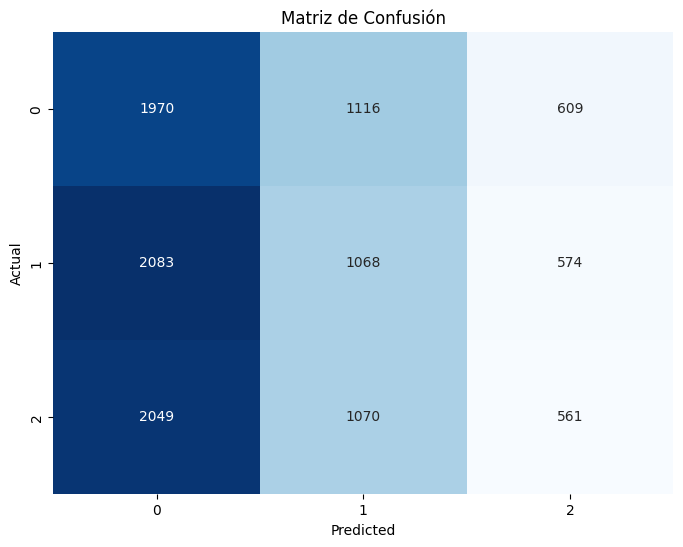

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades a etiquetas de clase

y_test_classes = np.argmax(y_test.values, axis=1) # Convierte y_train de One-Hot a etiquetas (categorías)

cm = confusion_matrix(y_test_classes, y_pred_classes)
# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(best_model)

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7c3da6da7d90>)),
                ('categoricasANumericas',
                 FunctionTransformer(func=<function categoricasANumericas at 0x7c3da6579510>)),
                ('preprocessor', StandardScaler()),
                ('clf',
                 KerasClassifier(activation='relu', epochs=30, hidden_layer_1=5, hidden_layer_2=100, hidden_layer_3=100, loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7c3da6da7b50>, n_layers=1, optimizer='sgd', optimizer__learning_rate=0.0001))])


# **Como conclusión final:**

Podemos decir que a pesar hacer una búsqueda de mejores hiper parámetros siempre evitando el overfit. Concluimos que no se encontraron debido a varias cosas, la primera y más obvia seria la cantidad de los nodos en los Layers, seria colocar un “for” y probando uno a uno de los hidden layer pero sabemos que sería un costo gigante computacionalmente. Además, en el tema de “optimizer” solo conocemos a Adam y sgd; habría que seguir viendo la materia para ver que opciones nos pueden dar. Es bueno aclarar que el Pipeline quitamos el modelo passthrough debido que al haber datos continuos altos como por ejemplo la cantidad de gasto del paciente, esto nos generaba ruido en el modelo es por eso que solamente nos enfocamos en el StandardScaler.
Cosas al valorar el modelo que a pesar que no se encontrar valores buenos en el precision o recall en el classification_report. Se mantuvo la lógica que hubo mejores resultados en train que en el test; claro después de hallar los hiper parámetros y encontrar el mejor modelo en el pipeline. Por último, en la matriz de confussion es más probable que en la prueba que realiza el hospital aparezca que eres abnormal. Claro que es mejor hacerle un examen a una personal que no necesita ser internada en el hospital como chequeo, que una persona que necesita una atención inmediata y sea catalogada normal.  


 # **# Preguntas Teóricas**

## ¿Cómo podemos mejorar el tiempo de entrenamiento de los modelos?

- Aumentar la capacidad de procesamiento del GPUs con mayores capacidades para solucionar problemas de AI.
-  Entrenar con lotes más grandes para reducir el número de iteraciones necesarias “epochs”.
- Utilizar algoritmos de optimización eficientes. Como Adam, y SGD que son lo más conocidos hasta ahora del curso Deep Learning.

## ¿Que es el EarlyStopping y cómo se puede automatizar utilizando callback? Está pregunta es más teórica, pero pueden incluir código si lo creen necesario.


-  Early Stopping detiene el entrenamiento al usarlo cuando el modelo deja de mejorar. El callback EarlyStopping monitorea la pérdida en la validación y detiene el entrenamiento si no hay mejora después de N épocas, con un umbral de mejora mínimo de 0.001.
Cuyo código seria de la siguiente forma:

model.fit(x_train, y_train, epochs=10, callbacks=my_callbacks)